<a href="https://colab.research.google.com/github/auiauk/stock/blob/master/nbpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Python学习笔记 20211008

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import re
!pip install tqsdk

from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/'  
sys.path.append(path)
os.chdir(path)
os.getcwd()

     |████████████████████████████████| 3.0 MB 4.9 MB/s 
     |████████████████████████████████| 111 kB 33.5 MB/s 
     |████████████████████████████████| 78 kB 6.5 MB/s 
     |████████████████████████████████| 130 kB 47.0 MB/s 
     |████████████████████████████████| 1.1 MB 51.7 MB/s 
     |████████████████████████████████| 144 kB 45.4 MB/s 
     |████████████████████████████████| 94 kB 1.5 MB/s 
     |████████████████████████████████| 271 kB 41.8 MB/s 
     |████████████████████████████████| 202 kB 47.3 MB/s 
Mounted at /content/drive


'/content/drive/MyDrive'

### 工作路径

In [2]:
os.listdir()

['colab',
 '.ipynb_checkpoints',
 'KQ.m@SHFE.ag_m01.csv',
 'Colab Notebooks',
 'SimHei.ttf',
 'data220128',
 '__pycache__',
 'myfunc.py',
 'ys_config.py',
 'ys_jukuan_db2.py',
 'signal_tq2.py',
 'nbpy (1).ipynb',
 'nbpy.ipynb']

In [3]:
print(sys.argv[0])#当前脚本的位置
print("1111")
print (os.getcwd())#获得当前目录
print (os.path.abspath('.'))#获得当前工作目录
print (os.path.abspath('..'))#获得当前工作目录的父目录
print (os.path.abspath(os.curdir))#获得当前工作目录

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py
1111
/content/drive/MyDrive
/content/drive/MyDrive
/content/drive
/content/drive/MyDrive


In [4]:
import signal_tq2
du = 'm01'
stocks = ['KQ.m@SHFE.rb', 'KQ.m@SHFE.ag']
cache_m01 = signal_tq2.local_MacdCache(du, PL_stocks=stocks)

在使用天勤量化之前，默认您已经知晓并同意以下免责条款，如果不同意请立即停止使用：https://www.shinnytech.com/blog/disclaimer/


MacdCache读取本地./data220128/KQ.m@SHFE.rb_m01.csv成功
MacdCache读取本地./data220128/KQ.m@SHFE.ag_m01.csv成功


In [ ]:
cache_m01.PL_bars['KQ.m@SHFE.ag'].tail()

,Unnamed: 0,updatetime,symbol,duration,close,open,high,low,volume,datetime,open_oi,close_oi,dif,dea,macd,gold,death,pre_cross_tm,high_limit_tm,low_limit_tm,close_limit_tm,dif_limit_tm,macd_limit_tm,ma05,ma10,ma20,ma30,ma60,ma120,ma250,ema07,ema50,mv05,mv20,sp,sem,vud,xdSP,xuSP,xdMCD,xuMCD,mid,ris0,dec0,ris,dec,spr,c0,bars_xdSP,bars_xuSP,loSP,hiSP,ssem,tsem
7995,7995,2022-01-28 14:55:00,KQ.m@SHFE.ag,60,4709.0,4710.0,4710.0,4707.0,1419.0,1.643353e+18,494571.0,494422.0,-0.052132,0.049644,-0.203552,False,False,None,None,None,None,None,None,4708.0,4708.7,None,4708.300000,4709.233333,4713.441667,4714.876,4708.769963,4709.555177,1305.4,1060.15,0.5,1.0,1.0,0,1,None,None,4709.5,True,False,True,False,1.0,0,9,0,4707.0,4711.0,1.0,1.0
7996,7996,2022-01-28 14:56:00,KQ.m@SHFE.ag,60,4709.0,4709.0,4711.0,4708.0,1558.0,1.643353e+18,494422.0,493841.0,-0.037509,0.032214,-0.139444,False,False,None,None,None,None,None,None,4708.8,4708.5,None,4708.400000,4709.133333,4713.341667,4714.852,4708.827472,4709.533406,1292.2,1083.00,0.5,1.0,1.0,0,0,None,None,4709.0,False,False,False,False,0.0,0,10,1,4708.0,4711.0,1.0,1.0
7997,7997,2022-01-28 14:57:00,KQ.m@SHFE.ag,60,4708.0,4709.0,4711.0,4707.0,1217.0,1.643353e+18,493841.0,493445.0,-0.105397,0.004692,-0.220176,False,False,None,None,None,None,None,None,4709.0,4708.3,None,4708.466667,4709.033333,4713.241667,4714.828,4708.620604,4709.473272,1336.0,1101.80,0.5,1.0,1.0,0,0,None,None,4708.5,False,True,False,False,0.0,0,11,2,4707.0,4711.0,1.0,1.0
7998,7998,2022-01-28 14:58:00,KQ.m@SHFE.ag,60,4706.0,4708.0,4708.0,4705.0,1741.0,1.643353e+18,493445.0,492882.0,-0.316928,-0.059632,-0.514591,False,False,None,None,None,None,None,None,4708.4,4708.1,None,4708.500000,4708.900000,4713.141667,4714.792,4707.965453,4709.337065,1475.2,1118.55,-0.5,-1.0,1.0,1,0,None,None,4707.0,False,True,False,True,-1.0,0,0,3,4705.0,4711.0,-1.0,-1.0
7999,7999,2022-01-28 14:59:00,KQ.m@SHFE.ag,60,4703.0,4706.0,4706.0,4701.0,3207.0,1.643353e+18,492882.0,492333.0,-0.718363,-0.191378,-1.053968,False,False,None,None,None,None,None,None,4707.0,4707.5,None,4708.500000,4708.716667,4713.008333,4714.748,4706.724090,4709.088553,1828.4,1235.05,-0.5,-1.0,1.0,0,0,None,None,4704.5,False,True,False,True,-1.0,0,1,4,4701.0,4711.0,-1.0,-1.0


### tafunc的时间转换函数

In [ ]:
# tqsdk的datetime转换为时间字符串
from tqsdk import tafunc
import time

df = pd.read_csv('KQ.m@SHFE.ag_m01.csv')
tq_time = df.datetime.iloc[-1]
tq_datetime = tafunc.time_to_datetime(df.iloc[-1]['datetime'])
print(tq_time,'\n',tq_datetime.strftime("%Y-%m-%d %H:%M:%S"))

在使用天勤量化之前，默认您已经知晓并同意以下免责条款，如果不同意请立即停止使用：https://www.shinnytech.com/blog/disclaimer/


1.61920254e+18 
 2021-04-23 18:29:00


### re.match分析字符串

In [ ]:
# 源自https://www.jianshu.com/p/cc26837242b1
import re
msg = 'name:Alice,age:6'
obj = re.match('name:(\w+),age:(\d+)', msg)
print(obj[0])    # name:Alice,age:6  原始字符
print(obj[1])    # Alice   第一匹配，第一个()
print(obj[2])    # 6     第二匹配，第二个()
print(obj.groups())    # ('Alice', '6')

name:Alice,age:6
Alice
6
('Alice', '6')


In [ ]:
t = re.match('([@])', msg)
if t:
  print(t[1])
else:
  print('not here')

not here


In [ ]:
x = (None or None)
if not x:
  print('x is None')
else:
  print(x)

x is None


In [ ]:
set1 = (1, 2, 3, 4)
a = 2
set2 = (a,)
set(set2).issubset(set1)  # 检查集合包含

True

In [ ]:
a = 'adf'
b = []
b.append(a)
b

['adf']

In [ ]:
a = {'a':12, 'b':23, 'c':34}  # 检查字典包含
b = 'bd'
b in a.keys()

False

In [ ]:
a = '12'
b = '23'
c = '34'
dd = list(df)
aa = [a,b,c]
se = set(dd)|set(aa)
print(se)

{'duration', 'close', 'barpos', '12', 'close_oi', 'datetime', 'open', '34', '23', 'open_oi', 'low', 'high', 'updatetime', 'symbol', 'volume'}


In [ ]:
def mysearch(s):
  if s in [4,5,6]:
    return True
  else:
    return False
a = mysearch(7)
b = 0
c = 3
eval('(a or b) > 0')

False

In [ ]:
eval('a')

False

### 条件匹配

In [ ]:
# 条件字符串：KQ.m@SHFE.rb_m05:ma05_xu_ma10 and KQ.m@SHFE.rb_m30:close>open

In [ ]:
import signal_tq2
df = pd.read_csv(r'./data220128/KQ.m@SHFE.rb_m01.csv')
my_indi = signal_tq2.PL_Indicator()
my_indi.gen_indi(df)
my_indi.PL_macd(df)

In [ ]:
df2 = df[['updatetime','close','ma05','ma10','macd']].copy()
df2.tail()

,updatetime,close,ma05,ma10,macd
7995,2022-01-28 14:55:00,4808.0,4801.2,4793.9,4.739495
7996,2022-01-28 14:56:00,4814.0,4806.2,4796.9,5.563165
7997,2022-01-28 14:57:00,4819.0,4810.8,4800.2,6.360826
7998,2022-01-28 14:58:00,4818.0,4812.0,4803.2,6.320062
7999,2022-01-28 14:59:00,4829.0,4817.6,4807.2,7.273144


In [ ]:
my_cd = signal_tq2.PL_CrossDetect()
my_cd.PL_is_cross(df2, signal_tq2.PL_DeathCross())

False

In [ ]:
for i in range(df.index):
  if my_cd.PL_is_cross(df2[:i], signal_tq2.PL_DeathCross()):
    print(f'{i-1} {df2.iloc[i-1].updatetime}')
  
    # break

2 2021-12-27 09:42:00
9 2021-12-27 09:49:00
16 2021-12-27 09:56:00
33 2021-12-27 10:13:00


In [ ]:
import myfunc
se = myfunc.xu(df.ma05, df.ma10)
se.describe()

count    8000.000000
mean        0.058750
std         0.235171
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
dtype: float64

### 计算指标

In [ ]:
import pandas as pd
from tqsdk import TqApi, TqAuth, TqSim, tafunc, ta

# 均线指标
def append_ma(df, *period):
  """用法举例：append_ma(df,5,10,30)
  """
  for p in period:
    if p<=0:
      break
    ma_str = 'ma0' if p<10 else 'ma'
    df[f'{ma_str}{p}'] = df.close.rolling(window=p).mean()
  df['ema07'] = ta.EMA(df, 7).ema.values
  
# MACD指标
def append_macd(df):
  exp12 = df['close'].ewm(span=12, adjust=False).mean()
  exp26 = df['close'].ewm(span=26, adjust=False).mean()
  df['dif'] = exp12 - exp26
  df['dea'] = df.dif.ewm(span=9, adjust=False).mean()
  df['macd'] = (df.dif - df.dea) * 2
  df['xdMCD'] = tafunc.crossdown(df.dif, df.dea).values

# SP指标
def append_sp(df):
  df['mid'] = (df.open + df.close) / 2
  df['ris0'] = (df.mid > df.ema07) & ((df.open!=df.close) | (df.low >= df.ema07))
  df['dec0'] = (df.mid < df.ema07) & ((df.open!=df.close) | (df.high <= df.ema07))
  df['ris'] = df.ris0 & df.ris0.shift(1)
  df['dec'] = df.dec0 & df.dec0.shift(1)
  df['spr'] = 1.0 * df.ris + -1.0 * df.dec   # 三值精灵1.0/0.0/-1.0, float类型是天勤web_gui的要求（验证出）
  df['sp'] = df.spr.replace(0, np.nan)
  df['sp'].fillna(method='ffill', inplace=True)   # 三值变二值
  df['ssem'] = (df.ema07>df.ma30).map({True:1.0, False:-1.0})  # 由ema07与ma30（简称“e7m”）金死叉定义的ssem


# 示例
data = pd.read_csv('KQ.m@SHFE.ag_m01.csv', index_col=1)
data.index = pd.to_datetime(data.index)

append_ma(data,5,30)
append_sp(data)
append_macd(data)

data = data[['open','high','low','close','volume','duration','symbol','ma05','ma30','ema07','sp','ssem','macd','xdMCD']]
print(data.loc['2021-04-08 00:02':'2021-04-08 00:10'])
data.tail()

ModuleNotFoundError: ignored

In [ ]:
df = data.copy()
df['sp'] = 1
df.tail()

In [ ]:
def gen_tsem(df):
    # 三值sem
    return df.ssem if (df.sp*df.ssem) > 0 else 0.0

In [ ]:
df_sp = df.sp
df_ssem = df.ssem
df['tsem'] = df.apply(lambda x:x.ssem if x.sp*x.ssem>0 else 0.0, axis=1)  # 结合sp的变化生成三值sem
df[df.tsem==1].head()
df['2021-04-02 09:50:00':'2021-04-02 10:01:00']

In [ ]:
warn_list = ['KQ.m@SHFE.ag_m01 ma05_xu_ma30', 'KQ.m@SHFE.ag_m01 xdMCD', 'KQ.m@SHFE.ag_m01 ma05>ma30']
for warn in warn_list:
  t = warn.split(' ')[1]  #'ma05>ma30'
  t1 = re.match('([A-Za-z0-9]+)_(\w+)_([A-Za-z0-9]+)',t) # 获取表达式中的前后两个变量
  t2 = re.match('([A-Za-z0-9]+)([<][=]|[>][=]|[!][=]|[=][=]|[<>=])([A-Za-z0-9]+)',t) # 获取表达式中的前后两个变量
  t3 = re.match('^[a-z]{2}[A-Z]\w*$',t)

  if t1 != None:
    print(f'{t1.group(1)}_{t1.group(2)}_{t1.group(3)}')
  elif t2 != None:
    mid_str = '==' if t2.group(2) == '=' else t2.group(2)
    # print(f'{t2.group(1)}{mid_str}{t2.group(3)}')
    # eval({data.iloc[-1][f'{t2.group(1)}']}{mid_str}{data.iloc[-1][f'{t2.group(3)}']})
    print(eval(str(df.iloc[-1][t2.group(1)])+mid_str+str(df.iloc[-1][t2.group(3)])))
  elif t3 != None:
    # print(f'{t3.group(0)}')
    print(df.iloc[-1][f'{t3.group(0)}'] == 1)
  else:
    print('Other cases.')

ma05_xu_ma30
True
False


In [ ]:
symdu_list = ['KQ.m@SHFE.ag_m01', 'KQ.m@SHFE.ag_m05', 'KQ.m@SHFE.cu_m01', 'KQ.m@SHFE.rb_m05']
#real_cache = {'m01':['KQ.m@SHFE.ag','KQ.m@SHFE.cu'], 'm05':['KQ.m@SHFE.ag','KQ.m@SHFE.rb']}
real_cache = dict()
for symdu in symdu_list:
  sym = symdu.split('_')[0]
  du = symdu.split('_')[1]
  if du in real_cache.keys():
    real_cache[du].append(sym)
  else:
    real_cache[du] = list()
    real_cache[du].append(sym)
real_cache

{'m01': ['KQ.m@SHFE.ag', 'KQ.m@SHFE.cu'],
 'm05': ['KQ.m@SHFE.ag', 'KQ.m@SHFE.rb']}

In [ ]:
data_05 = pd.read_csv('KQ.m@SHFE.ag_m05.csv', index_col=0)
data_05.index = pd.to_datetime(data_05.index)
# data_05 = data_05.loc[data.index[0] : data.index[-1]]
append_ma(data_05, 5)
# data_05 = data_05.dropna()
data_05.loc['2021-04-08'] 

,open,high,low,close,volume,open_oi,close_oi,duration,symbol,MA5
Updatetime,,,,,,,,,,
2021-04-08 00:00:00,5269,5271,5266,5268,4446,420123,420629,300,KQ.m@SHFE.ag,5265.6
2021-04-08 00:05:00,5268,5271,5267,5270,2291,420629,420526,300,KQ.m@SHFE.ag,5267.4
2021-04-08 00:10:00,5270,5270,5265,5266,2239,420526,420278,300,KQ.m@SHFE.ag,5267.6
2021-04-08 00:15:00,5266,5266,5261,5264,3437,420278,420088,300,KQ.m@SHFE.ag,5267.4
2021-04-08 00:20:00,5264,5265,5260,5263,3240,420088,419941,300,KQ.m@SHFE.ag,5266.2
...,...,...,...,...,...,...,...,...,...,...
2021-04-08 23:35:00,5346,5348,5344,5346,2049,434412,434127,300,KQ.m@SHFE.ag,5346.2
2021-04-08 23:40:00,5346,5349,5345,5348,2260,434127,433870,300,KQ.m@SHFE.ag,5346.2
2021-04-08 23:45:00,5348,5353,5347,5352,3338,433870,433871,300,KQ.m@SHFE.ag,5347.6


In [ ]:
data = data.loc[data_05.index[0]:data_05.index[-1]]
# data.loc['2021-04-02 09:20:00':'2021-04-02 10:10:00']
data

,barpos,symbol,duration,close,open,high,low,volume,datetime,open_oi,close_oi,MA5
updatetime,,,,,,,,,,,,
2021-04-02 09:20:00,25,KQ.m@SHFE.ag,60,5229.0,5227.0,5229.0,5226.0,1178.0,1.617326e+18,440546.0,440056.0,5228.0
2021-04-02 09:21:00,26,KQ.m@SHFE.ag,60,5228.0,5229.0,5230.0,5228.0,546.0,1.617326e+18,440056.0,439905.0,5227.6
2021-04-02 09:22:00,27,KQ.m@SHFE.ag,60,5229.0,5228.0,5230.0,5227.0,676.0,1.617327e+18,439905.0,439708.0,5227.8
2021-04-02 09:23:00,28,KQ.m@SHFE.ag,60,5228.0,5229.0,5230.0,5228.0,413.0,1.617327e+18,439708.0,439568.0,5228.2
2021-04-02 09:24:00,29,KQ.m@SHFE.ag,60,5229.0,5228.0,5230.0,5228.0,750.0,1.617327e+18,439568.0,439230.0,5228.6
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-13 02:21:00,2996,KQ.m@SHFE.ag,60,5196.0,5198.0,5199.0,5195.0,812.0,1.618252e+18,412573.0,412449.0,5199.2
2021-04-13 02:22:00,2997,KQ.m@SHFE.ag,60,5196.0,5196.0,5197.0,5195.0,444.0,1.618252e+18,412449.0,412326.0,5198.0
2021-04-13 02:23:00,2998,KQ.m@SHFE.ag,60,5196.0,5196.0,5198.0,5195.0,489.0,1.618252e+18,412326.0,412235.0,5197.2


In [ ]:
data['new'] = 1
data.loc[data['close']<data['open'], 'new'] = 0
data.new

updatetime
2021-04-02 02:25:00    0
2021-04-02 02:26:00    0
2021-04-02 02:27:00    1
2021-04-02 02:28:00    1
2021-04-02 02:29:00    1
                      ..
2021-04-24 02:25:00    0
2021-04-24 02:26:00    1
2021-04-24 02:27:00    1
2021-04-24 02:28:00    0
2021-04-24 02:29:00    0
Name: new, Length: 8000, dtype: int64

In [ ]:
data['n2'] = pd.Series([1 for i in range(len(data))], index=data.index)
# data['n2'] = 1
data.n2

updatetime
2021-04-02 02:25:00    1
2021-04-02 02:26:00    1
2021-04-02 02:27:00    1
2021-04-02 02:28:00    1
2021-04-02 02:29:00    1
                      ..
2021-04-24 02:25:00    1
2021-04-24 02:26:00    1
2021-04-24 02:27:00    1
2021-04-24 02:28:00    1
2021-04-24 02:29:00    1
Name: n2, Length: 8000, dtype: int64

In [ ]:
data = pd.read_csv('KQ.m@SHFE.ag_m01.csv', index_col=1)
data=data.assign(a='abc')
data.a

updatetime
2021-04-02 02:25:00    abc
2021-04-02 02:26:00    abc
2021-04-02 02:27:00    abc
2021-04-02 02:28:00    abc
2021-04-02 02:29:00    abc
                      ... 
2021-04-24 02:25:00    abc
2021-04-24 02:26:00    abc
2021-04-24 02:27:00    abc
2021-04-24 02:28:00    abc
2021-04-24 02:29:00    abc
Name: a, Length: 8000, dtype: object

In [ ]:
data2 = pd.read_csv('test_data.csv', index_col=0)
data2.index = pd.to_datetime(data2.index)

In [ ]:
def asg(df):
    df['a'] = 'abc'
#     df = df.assign(b=pd.Series(sma_values, index=df.index))
#     df = df.assign(b='123')
    df = df.assign(b=123)
    df['c'] = df.b
    print(df.tail(3))

data = pd.read_csv('KQ.m@SHFE.ag_m01.csv', index_col=1)
asg(data)
data.tail(3)

                     barpos        symbol  duration   close    open    high  \
updatetime                                                                    
2021-04-24 02:27:00    7997  KQ.m@SHFE.ag        60  5410.0  5408.0  5410.0   
2021-04-24 02:28:00    7998  KQ.m@SHFE.ag        60  5406.0  5410.0  5410.0   
2021-04-24 02:29:00    7999  KQ.m@SHFE.ag        60  5404.0  5406.0  5408.0   

                        low  volume      datetime   open_oi  close_oi    a  \
updatetime                                                                   
2021-04-24 02:27:00  5408.0   791.0  1.619202e+18  400810.0  400218.0  abc   
2021-04-24 02:28:00  5406.0   699.0  1.619202e+18  400218.0  399774.0  abc   
2021-04-24 02:29:00  5404.0  1235.0  1.619203e+18  399774.0  399135.0  abc   

                       b    c  
updatetime                     
2021-04-24 02:27:00  123  123  
2021-04-24 02:28:00  123  123  
2021-04-24 02:29:00  123  123  


,barpos,symbol,duration,close,open,high,low,volume,datetime,open_oi,close_oi,a
updatetime,,,,,,,,,,,,
2021-04-24 02:27:00,7997,KQ.m@SHFE.ag,60,5410.0,5408.0,5410.0,5408.0,791.0,1.619202e+18,400810.0,400218.0,abc
2021-04-24 02:28:00,7998,KQ.m@SHFE.ag,60,5406.0,5410.0,5410.0,5406.0,699.0,1.619202e+18,400218.0,399774.0,abc
2021-04-24 02:29:00,7999,KQ.m@SHFE.ag,60,5404.0,5406.0,5408.0,5404.0,1235.0,1.619203e+18,399774.0,399135.0,abc


In [ ]:
# 计算MACD
def append_macd(df):
    exp12 = df['close'].ewm(span=12, adjust=False).mean()
    exp26 = df['close'].ewm(span=26, adjust=False).mean()
    df['dif'] = exp12 - exp26
    df['dea'] = df.dif.ewm(span=9, adjust=False).mean()
    df['macd'] = (df.dif - df.dea) * 2
    df['macd-m'] = df.dif
    df['macd-s'] = df.dea
    df['macd-h'] = df.macd

# 示例
data = pd.read_csv('KQ.m@SHFE.ag_m01.csv', index_col=1)
append_macd(data)
data.head(7)

,barpos,symbol,duration,close,open,high,low,volume,datetime,open_oi,close_oi,dif,dea,macd,macd-m,macd-s,macd-h
updatetime,,,,,,,,,,,,,,,,,
2021-04-02 02:25:00,0,KQ.m@SHFE.ag,60,5207.0,5209.0,5209.0,5207.0,251.0,1.617302e+18,449705.0,449698.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-04-02 02:26:00,1,KQ.m@SHFE.ag,60,5206.0,5207.0,5208.0,5206.0,440.0,1.617302e+18,449698.0,449472.0,-0.079772,-0.015954,-0.127635,-0.079772,-0.015954,-0.127635
2021-04-02 02:27:00,2,KQ.m@SHFE.ag,60,5207.0,5206.0,5207.0,5205.0,894.0,1.617302e+18,449472.0,448990.0,-0.061590,-0.025082,-0.073018,-0.061590,-0.025082,-0.073018
2021-04-02 02:28:00,3,KQ.m@SHFE.ag,60,5209.0,5207.0,5209.0,5206.0,806.0,1.617302e+18,448990.0,448459.0,0.112901,0.002515,0.220771,0.112901,0.002515,0.220771
2021-04-02 02:29:00,4,KQ.m@SHFE.ag,60,5215.0,5209.0,5218.0,5207.0,3386.0,1.617302e+18,448459.0,446933.0,0.726956,0.147403,1.159106,0.726956,0.147403,1.159106
2021-04-02 09:00:00,5,KQ.m@SHFE.ag,60,5220.0,5228.0,5230.0,5216.0,6715.0,1.617325e+18,446933.0,445584.0,1.598629,0.437648,2.321962,1.598629,0.437648,2.321962
2021-04-02 09:01:00,6,KQ.m@SHFE.ag,60,5229.0,5220.0,5238.0,5219.0,6829.0,1.617325e+18,445584.0,444387.0,2.981295,0.946378,4.069835,2.981295,0.946378,4.069835


In [ ]:
# 计算BOLL
def append_boll(df):
    # SMA:简单移动平均(Simple Moving Average)
    time_period = 20  # SMA的计算周期，默认为20
    stdev_factor = 2  # 上下频带的标准偏差比例因子
    history = []  # 每个计算周期所需的价格数据
    sma_values = []  # 初始化SMA值
    upper_band = []  # 初始化阻力线价格
    lower_band = []  # 初始化支撑线价格

    # 构造列表形式的绘图数据
    for close_price in df['close']:
        # 
        history.append(close_price)

        # 计算移动平均时先确保时间周期不大于20
        if len(history) > time_period:
            del (history[0])

        # 将计算的SMA值存入列表
        sma = np.mean(history)
        sma_values.append(sma)  
        # 计算标准差
        stdev = np.sqrt(np.sum((history - sma) ** 2) / len(history))  
        upper_band.append(sma + stdev_factor * stdev)
        lower_band.append(sma - stdev_factor * stdev)

    # 将计算的数据合并到DataFrame
#     df = df.assign(bb_m=pd.Series(sma_values, index=df.index))     # 用这种赋值方法不能达到修改原变量的目的
#     df = df.assign(bb_u=pd.Series(upper_band, index=df.index))
#     df = df.assign(bb_l=pd.Series(lower_band, index=df.index))
    df['bb-m'] = pd.Series(sma_values, index=df.index)    # 这样赋值可以修改原变量
    df['bb-u'] = pd.Series(upper_band, index=df.index)
    df['bb-l'] = pd.Series(lower_band, index=df.index)

In [ ]:
# 示例
data = pd.read_csv('KQ.m@SHFE.ag_m01.csv', index_col=1)
append_boll(data)
data.tail(3)

NameError: name 'append_boll' is not defined

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


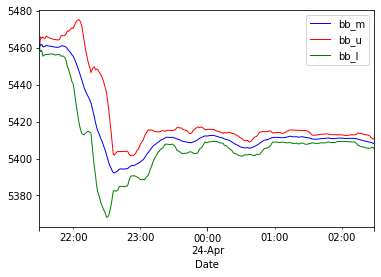

In [ ]:
# 计算BOLL
import pandas as pd
import numpy as np
# 绘图
import matplotlib.pyplot as plt
# 设置图像标签显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
import matplotlib as mpl
# 解决一些编辑器(VSCode)或IDE(PyCharm)等存在的图片显示问题，
# 应用Tkinter绘图，以便对图形进行放缩操作
# mpl.use('TkAgg')


# 导入数据并做处理
def import_csv(stock_code):
    df = pd.read_csv(stock_code + '.csv')
    df.rename(columns={
        'updatetime': 'Date',
        'open': 'Open',
        'high': 'High',
        'low': 'Low',
        'close': 'Close',
        'volume': 'Volume'
    },
              inplace=True)
    df['Date'] = pd.to_datetime(df['Date'], format='%Y/%m/%d %H:%M')
    df.set_index(['Date'], inplace=True)
    return df


stock_code = 'KQ.m@SHFE.ag_m01'
# 绘制数据的规模
scale = 300
df = import_csv(stock_code)[-scale:]

# SMA:简单移动平均(Simple Moving Average)
time_period = 20  # SMA的计算周期，默认为20
stdev_factor = 2  # 上下频带的标准偏差比例因子
history = []  # 每个计算周期所需的价格数据
sma_values = []  # 初始化SMA值
upper_band = []  # 初始化阻力线价格
lower_band = []  # 初始化支撑线价格

# 构造列表形式的绘图数据
for close_price in df['Close']:
    # 
    history.append(close_price)

    # 计算移动平均时先确保时间周期不大于20
    if len(history) > time_period:
        del (history[0])

    # 将计算的SMA值存入列表
    sma = np.mean(history)
    sma_values.append(sma)  
    # 计算标准差
    stdev = np.sqrt(np.sum((history - sma) ** 2) / len(history))  
    upper_band.append(sma + stdev_factor * stdev)
    lower_band.append(sma - stdev_factor * stdev)

# 将计算的数据合并到DataFrame
# df = df.assign(收盘价=pd.Series(df['Close'], index=df.index))
df = df.assign(bb_m=pd.Series(sma_values, index=df.index))
df = df.assign(bb_u=pd.Series(upper_band, index=df.index))
df = df.assign(bb_l=pd.Series(lower_band, index=df.index))

# 绘图
ax = plt.figure()
# 设定y轴标签
ax.ylabel = '%s price in ￥' % (stock_code)

# df['收盘价'].plot(color='k', lw=1., legend=True)
df['bb_m'].plot(color='b', lw=1., legend=True)
df['bb_u'].plot(color='r', lw=1., legend=True)
df['bb_l'].plot(color='g', lw=1., legend=True)
plt.show()

In [ ]:
df.tail(7)

,barpos,symbol,duration,Close,Open,High,Low,Volume,datetime,open_oi,close_oi,bb_m,bb_u,bb_l
Date,,,,,,,,,,,,,,
2021-04-24 02:23:00,7993,KQ.m@SHFE.ag,60,5408.0,5408.0,5408.0,5406.0,760.0,1.619202e+18,401403.0,401230.0,5409.20,5412.755278,5405.644722
2021-04-24 02:24:00,7994,KQ.m@SHFE.ag,60,5409.0,5408.0,5409.0,5407.0,179.0,1.619202e+18,401230.0,401132.0,5409.10,5412.558323,5405.641677
2021-04-24 02:25:00,7995,KQ.m@SHFE.ag,60,5408.0,5409.0,5409.0,5408.0,399.0,1.619202e+18,401132.0,401006.0,5408.95,5412.324907,5405.575093
2021-04-24 02:26:00,7996,KQ.m@SHFE.ag,60,5408.0,5408.0,5409.0,5408.0,337.0,1.619202e+18,401006.0,400810.0,5408.70,5411.535489,5405.864511
2021-04-24 02:27:00,7997,KQ.m@SHFE.ag,60,5410.0,5408.0,5410.0,5408.0,791.0,1.619202e+18,400810.0,400218.0,5408.60,5411.081935,5406.118065
2021-04-24 02:28:00,7998,KQ.m@SHFE.ag,60,5406.0,5410.0,5410.0,5406.0,699.0,1.619202e+18,400218.0,399774.0,5408.30,5410.500000,5406.100000
2021-04-24 02:29:00,7999,KQ.m@SHFE.ag,60,5404.0,5406.0,5408.0,5404.0,1235.0,1.619203e+18,399774.0,399135.0,5408.00,5410.756810,5405.243190


In [ ]:
!fc-match

LiberationMono-Regular.ttf: "Liberation Mono" "Regular"


In [ ]:
import matplotlib
print(matplotlib.matplotlib_fname()) # matplotlib字体配置文件路径

/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/matplotlibrc


Text(0.5, 1.0, 'hello 你好')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22909 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 20320 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 22909 missing from current font.
  font.set_text(s, 0, flags=flags)


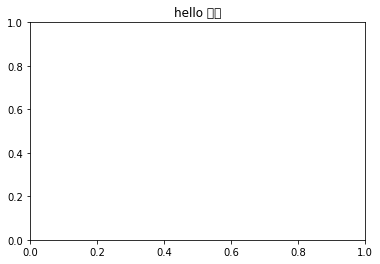

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']   # 显示中文
plt.rcParams['axes.unicode_minus'] = False
plt.title('hello 你好')

In [ ]:
fm = FontManager()
fm.ttflist

NameError: ignored

### DataFrame列之条件赋值 211008

In [ ]:
import pandas as pd
import numpy as np
from numpy import nan as NaN

In [ ]:
df_index = pd.date_range('20211014 13:35', periods=5, freq='min')
df = pd.DataFrame(np.arange(20).reshape(5,4), index=df_index,  columns=list('ABCD')) # 一行创建Dataframe
df

,A,B,C,D
2021-10-14 13:35:00,0,1,2,3
2021-10-14 13:36:00,4,5,6,7
2021-10-14 13:37:00,8,9,10,11
2021-10-14 13:38:00,12,13,14,15
2021-10-14 13:39:00,16,17,18,19


In [ ]:
df[['A','B']].max(axis=1)

2021-10-14 13:35:00     1
2021-10-14 13:36:00     5
2021-10-14 13:37:00     9
2021-10-14 13:38:00    13
2021-10-14 13:39:00    17
Freq: T, dtype: int64

In [ ]:
# 由字典创建Dataframe
df = pd.DataFrame({'one':['a', 'a', 'b', 'c', 'd'], 'two':[1, 0, -1, 0, 0], 'three':['C','B','B','A', 'D']})
df['four'] = [13, 19, 20, 87, 56]  # 添加列
print(df)   

  one  two three  four
0   a    1     C    13
1   a    0     B    19
2   b   -1     B    20
3   c    0     A    87
4   d    0     D    56


In [ ]:
# 三值变二值，即列two中去掉0，代之以其前非0值
df2 = df.copy()
df2['five'] = df2.two.replace(0,np.nan) # 第一步：将0值改为nan，为了下一步用fillna
df2

,one,two,three,four,five
0,a,1,C,13,1.0
1,a,0,B,19,NaN
2,b,-1,B,20,-1.0
3,c,0,A,87,NaN
4,d,0,D,56,NaN


In [ ]:
df2.five.fillna(method='ffill', inplace=True)   # 第二步：用NaN前面的值来填充（将第two列转变为第five列）

In [ ]:
df2

,one,two,three,four,five
0,a,1,C,13,1.0
1,a,0,B,19,1.0
2,b,-1,B,20,-1.0
3,c,0,A,87,-1.0
4,d,0,D,56,-1.0


In [ ]:
# 由二维列表创建DataFrame
df=pd.DataFrame([[1,2,3],[NaN,NaN,2],[NaN,NaN,NaN],[8,8,NaN]])
df

,0,1,2
0,1.0,2.0,3.0
1,NaN,NaN,2.0
2,NaN,NaN,NaN
3,8.0,8.0,NaN


In [ ]:
dff = pd.DataFrame({
    'A': np.arange(5),
    'B': pd.Timestamp('20211014'),
    'nb': pd.date_range('20211014 13:35:00', freq='min', periods=5),
    'C': pd.Series(3, index=np.arange(5), dtype='float32'),
    'D': np.array([3] * 5),
    'E': pd.Categorical(['test', 'train', 'train','test','train']),
    'F': 'foo'})   # 由字典创建Dataframe
dff = dff.set_index('nb')  # Dataframe的时间索引
print(dff)

                     A          B    C  D      E    F
nb                                                   
2021-10-14 13:35:00  0 2021-10-14  3.0  3   test  foo
2021-10-14 13:36:00  1 2021-10-14  3.0  3  train  foo
2021-10-14 13:37:00  2 2021-10-14  3.0  3  train  foo
2021-10-14 13:38:00  3 2021-10-14  3.0  3   test  foo
2021-10-14 13:39:00  4 2021-10-14  3.0  3  train  foo


In [ ]:
pd.Series(np.nan, index=dff.index)

nb
2021-10-14 13:35:00   NaN
2021-10-14 13:36:00   NaN
2021-10-14 13:37:00   NaN
2021-10-14 13:38:00   NaN
2021-10-14 13:39:00   NaN
dtype: float64

In [ ]:
t = dff.C.copy()
ll = ['2021-10-14 13:36:00']
for tm in ll:
    t[tm] = 5
t

nb
2021-10-14 13:35:00    3.0
2021-10-14 13:36:00    5.0
2021-10-14 13:37:00    3.0
2021-10-14 13:38:00    3.0
2021-10-14 13:39:00    3.0
Name: C, dtype: float32

### loc与iloc的互查 211016

In [ ]:
raw_name = dff[(dff['A']>0) & (dff['A']<4)].index[2]
print(dff.index.get_loc(raw_name))   # 由loc查询iloc
print(dff.iloc[1].name)   # 由iloc查询loc

3
2021-10-14 13:36:00


In [ ]:
df2 = dff[:3].copy()
df2

,A,B,C,D,E,F
B1,,,,,,
2021-10-14 13:35:00,0,2021-10-14,3.0,3,test,foo
2021-10-14 13:36:00,1,2021-10-14,3.0,3,train,foo
2021-10-14 13:37:00,2,2021-10-14,3.0,3,train,foo


In [ ]:
x = dfa.B
x

2021-10-14 13:35:00     1
2021-10-14 13:36:00     5
2021-10-14 13:37:00     9
2021-10-14 13:38:00    13
2021-10-14 13:39:00    17
Freq: T, Name: B, dtype: int64

In [ ]:
x[df2.index[0]:df2.index[-1]]

2021-10-14 13:35:00    1
2021-10-14 13:36:00    5
2021-10-14 13:37:00    9
Freq: T, Name: B, dtype: int64

In [ ]:
dfa[df2.index[0]:df2.index[-1]]

,A,B,C,D
2021-10-14 13:35:00,0,1,2,3
2021-10-14 13:36:00,4,5,6,7
2021-10-14 13:37:00,8,9,10,11


In [ ]:
s_time = pd.Timestamp('2021-10-14 13:36:00')
e_time = '2021-10-14 13:38:00'
dff[s_time:e_time]

,A,B,C,D,E,F
B1,,,,,,
2021-10-14 13:36:00,1,2021-10-14,3.0,3,train,foo
2021-10-14 13:37:00,2,2021-10-14,3.0,3,train,foo
2021-10-14 13:38:00,3,2021-10-14,3.0,3,test,foo


In [ ]:
df.loc[df['two']==2, 'one']='x' #修改列"one"的值，推荐使用本方法loc
print(df)

df.one[df.two==2]='x'   #不推荐，会报警SettingWithCopyWarning
print(df) 

df.loc[df['three']==df['three'].shift(1), 'one'] = 'y'  # 赋值条件可以是不同行的数据
print(df)

  one  two three  four
0   a    3     C    13
1   a    1     B    19
2   x    2     B    20
3   c    3     A    87
  one  two three  four
0   a    3     C    13
1   a    1     B    19
2   x    2     B    20
3   c    3     A    87
  one  two three  four
0   a    3     C    13
1   a    1     B    19
2   y    2     B    20
3   c    3     A    87


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df3 = df.copy()  # copy()后不改变原df
df3.loc[3,'four']=89
print(df, '\n',df3)

  one  two three  four
0   a    3     C    13
1   a    1     B    19
2   y    2     B    20
3   c    3     A    87 
   one  two three  four
0   a    3     C    13
1   a    1     B    19
2   y    2     B    20
3   c    3     A    89


In [ ]:
import numpy as np

In [ ]:
df3 = df.copy()
df3[['five', 'six']] = df3[['one', 'four']]  # 多列赋值
df3.loc[df3['three']==df3['three'].shift(1), 'five'] = np.nan
print(df3)

  one  two three  four five  six
0   a    3     C    13    a   13
1   a    1     B    19    a   19
2   y    2     B    20  NaN   20
3   c    3     A    87    c   87


In [ ]:
df3['five'].tolist()[-2:]

[nan, 'c']

In [ ]:
a,b = df3.iloc[-1][['one','two']]
print(a,b)

c 3


### dataframe行列赋值以None为条件判断时，只能用pd.isnull()函数

In [ ]:
df.loc[2,'one']= None
df

,one,two,three,four
0,a,3,C,13
1,a,1,B,19
2,None,2,B,20
3,c,3,A,87


In [ ]:
df.loc[df['one']==None,'two']= np.nan  #不报错，但无效果
df

,one,two,three,four
0,a,3.0,C,13
1,a,1.0,B,19
2,None,2.0,B,20
3,c,3.0,A,87


In [ ]:
df.loc[pd.isnull(df['one']), 'two'] = np.nan  #必须这样才正确
df

,one,two,three,four
0,a,3.0,C,13
1,a,1.0,B,19
2,None,NaN,B,20
3,c,3.0,A,87


### 设置列的格式 

In [ ]:
format = lambda x: '%.2f' %x
df2 = df[['two', 'four']].applymap(format)
df2

,two,four
0,3.00,13.00
1,1.00,19.00
2,2.00,20.00
3,3.00,87.00


In [ ]:
tf = False
sub = [3]
panel_list = ['main']
panel_list.append('vol') if tf else panel_list
panel_list

['main']

### 函数传参
#### 当可变参数传参时，它之前的默认参数都需要传参 @自思211022

In [ ]:
def calc(*numbers):
    sum = 0
    for n in numbers:
        sum = sum + n
    return sum

In [ ]:
calc(1,2,3)

6

In [ ]:
num = [1,2,3]
calc(*num)  # list前加*表示将list中的元素一一传入函数

6

#### 默认参数传参

In [ ]:
def func(str1, str2='hello', str3=None):
        print(f'str1={str1}')
        print(f'str2={str2}')
        print(f'str3={str3}')


In [ ]:
func('a','c')

str1=a
str2=c
str3=None


In [ ]:
func('a',str3='c')  
# 当默认参数不传参时，后续参数要写参数名，即变成了关键字参数，而可变参数不能放在关键字参数的后面 @自思211022

str1=a
str2=hello
str3=c


### 重新加载模块 211009

In [ ]:
import importlib
importlib.reload(ys_macd_signal)

### 画K线图：主图及MACD副图 211011

In [ ]:
import mplfinance as mpf  # 替换 import matplotlib.finance as mpf

def draw_kline_01(df, *signal):
    """
    主图：显示K线、3均线及信号（signal）标注
    副图：MACD
    """
    add_plot = [
        mpf.make_addplot(df[['dif','dea']], panel=1, secondary_y=True),    #panel=1 副图1
        mpf.make_addplot(df.macd, panel=1, type='bar', width=0.7, color='dimgray', alpha=1,
                                secondary_y=False),
    ]    
    for s in signal:
        start = df.index[0]
        end = df.index[-1]
        add_plot.append(mpf.make_addplot(s[0][start:end], type='scatter', markersize=100, marker=s[1]))   #主图标注信号      

    mpf.plot(df, type='candle', mav=(5, 10, 30), volume=False, addplot=add_plot, figratio=(10, 5),
#                     figscale=1, figratio=(5, 3), title='MACD'
            )

    plt.show()  # 显示
    plt.close()  # 关闭plt，释放内存

In [ ]:
import mplfinance as mpf  # 替换 import matplotlib.finance as mpf
import matplotlib.pyplot as plt

def draw_kline(df, vol=False, sub=[], *signals):
    """
    主图：显示K线、3均线及信号（signal）标注
    副图：MACD
    signal: list类型，signal[0]为信号列的列名，signal[1]为标记信号的字符串
    """
    add_plot = []
    macd_panel = 0
    sp_panel = 0
    
    macd_panel = 0 if 'macd' not in sub else sub.index('macd')+vol+1
    sp_panel = 0 if 'sp' not in sub else sub.index('sp')+vol+1
    
    if macd_panel > 0:
        if 'macd' in list(df):    
            add_plot.append(mpf.make_addplot(df[['dif','dea']], panel=macd_panel, secondary_y=True))
            add_plot.append(mpf.make_addplot(df['macd'], panel=macd_panel, type='bar', width=0.7, color='dimgray', alpha=1,
                                    secondary_y=False))
        else:
            exp12 = df['close'].ewm(span=12, adjust=False).mean()
            exp26 = df['close'].ewm(span=26, adjust=False).mean()
            dif = exp12 - exp26
            dea = dif.ewm(span=9, adjust=False).mean()
            macd = (dif - dea) * 2
            add_plot.append(mpf.make_addplot(dif, panel=macd_panel, secondary_y=True))
            add_plot.append(mpf.make_addplot(dea, panel=macd_panel, secondary_y=True))
            add_plot.append(mpf.make_addplot(macd, panel=macd_panel, type='bar', width=0.7, color='dimgray', alpha=1,
                                    secondary_y=False))
        
    if sp_panel > 0:
        if 'sp' in list(df):    
            pass
        else:
            pass

    for ss in signals:
        pots = pd.Series(np.nan, index=df.index)
        for tm in ss.time:
           pots[tm] = df.loc[tm, ss.value]
        add_plot.append(mpf.make_addplot(pots, panel=ss.panel, type='scatter', markersize=100, marker=ss.marker))   #主图标注信号      

    mpf.plot(df, type='candle', mav=(5, 10, 30), volume=vol, addplot=add_plot, figratio=(10, 5),
#                     figscale=1, figratio=(5, 3), title='MACD'
            )

### K线图中画信号

In [ ]:
# 信号变量为字典类型，其中的cross键的含义以画低点为例说明：金叉是判断低点的时刻，此时刻与低点的显示方式可以有交叉和非交叉两种
lo_xpots = {'time':df['low_limit_tm'].dropna(), 'value':'low', 'cross':True, 'panel_name':'main', 'marker':'v'}
lo_pots = {'time':df['low_limit_tm'].dropna().index, 'value':'low', 'cross':False, 'panel_name':'main', 'marker':'v'}
ys_signal.draw_kline(df['2021-04-02 10:02:00':'2021-04-02 14:08:00'], False, ['macd'], hi_pots, lo_xpots, lo_pots)

In [ ]:
df = pd.read_csv('KQ.m@SHFE.ag_m01.csv')
df['updatetime'] = pd.to_datetime(df.datetime, origin=pd.Timestamp('1970-01-01 08:00:00'))
df.set_index('updatetime', inplace=True)
df.head(3)

,barpos,symbol,duration,close,open,high,low,volume,datetime,open_oi,close_oi
updatetime,,,,,,,,,,,
2021-04-02 02:25:00,0,KQ.m@SHFE.ag,60,5207.0,5209.0,5209.0,5207.0,251.0,1.617302e+18,449705.0,449698.0
2021-04-02 02:26:00,1,KQ.m@SHFE.ag,60,5206.0,5207.0,5208.0,5206.0,440.0,1.617302e+18,449698.0,449472.0
2021-04-02 02:27:00,2,KQ.m@SHFE.ag,60,5207.0,5206.0,5207.0,5205.0,894.0,1.617302e+18,449472.0,448990.0


In [ ]:
'2021-04-02 02:29:00' in df.index

True

macd_panel=1


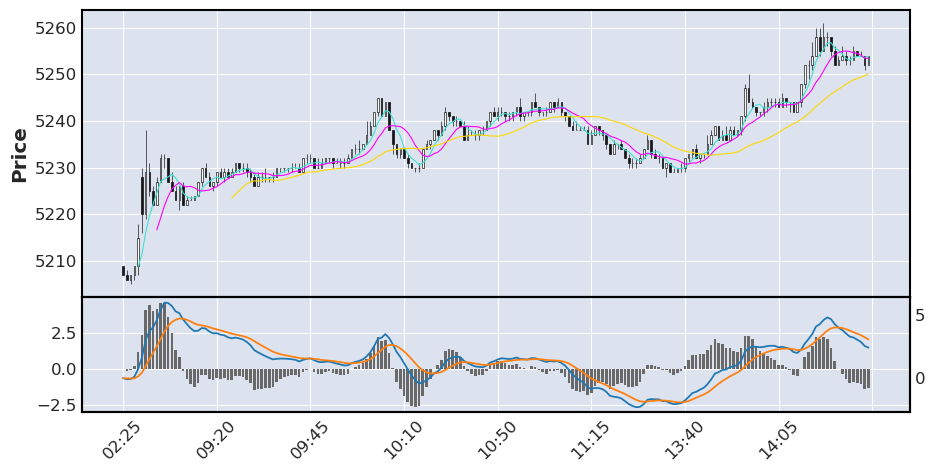

In [ ]:
draw_kline(df[:200], sub=['macd'])

### 将画K线图封装为类 211115

In [ ]:
class candle:
    def __init__(self, df, vol_display, sub_fig, title_fig, signals):
        self.df = df
        self.vol_display = vol_display
        self.sub_fig = sub_fig
        self.titile_fig = title_fig
        self.signals = signals

    def draw(self):
        """
        基本K线图
        主图：显示K线、6均线及高低点标注
        副图：成交量、MACD
        signals: 字典类型
        signal['time']: 横坐标（时间值）
        signal['value']: 纵坐标（价格或者指标值）
        signal['cross_display']: 是否交叉显示
        signal['marker']: 信号标识符
        """
        panel_list = ['main']
        panel_list.append('vol') if self.vol_display else panel_list
        panel_list.extend(self.sub_fig)
        add_plot = []
        
        macd_panel = 0 if 'macd' not in panel_list else panel_list.index('macd')
        sp_panel = 0 if 'sp' not in panel_list else panel_list.index('sp')
        
        if macd_panel > 0:
            if 'macd' in list(self.df):    
                add_plot.append(mpf.make_addplot(self.df[['dif','dea']], panel=macd_panel, secondary_y=True))
                add_plot.append(mpf.make_addplot(self.df['macd'], panel=macd_panel, type='bar', width=0.7, color='dimgray', alpha=1,
                                        secondary_y=False))
            else:
                exp12 = self.df['close'].ewm(span=12, adjust=False).mean()
                exp26 = self.df['close'].ewm(span=26, adjust=False).mean()
                dif = exp12 - exp26
                dea = dif.ewm(span=9, adjust=False).mean()
                macd = (dif - dea) * 2
                add_plot.append(mpf.make_addplot(dif, panel=macd_panel, secondary_y=True))
                add_plot.append(mpf.make_addplot(dea, panel=macd_panel, secondary_y=True))
                add_plot.append(mpf.make_addplot(macd, panel=macd_panel, type='bar', width=0.7, color='dimgray', alpha=1,
                                        secondary_y=False))
            
        if sp_panel > 0:
            if 'sp' in list(self.df):    
                pass
            else:
                pass

        for ss in self.signals:
            pots = pd.Series(np.nan, index=self.df.index)   
            if ss['cross_display']:   # 交叉显示，即以检测到的时间和检测到的极值定位显示坐标
                try:
                    for tm in ss['time'].index:
                        if tm in pots.index:
                            pots[tm] = self.df.loc[ss['time'][tm], ss['value']]  # 极值检测到的时刻与极值进行交叉显示
                except:
                    print(u'信号时间序列%s无法用于交叉显示。'%ss['time'])
                    break

            else:
                for tm in ss['time']:
                    if tm in pots.index:
                        pots[tm] = self.df.loc[tm, ss['value']]
                

            panel_number = panel_list.index(ss['panel_name'])
            add_plot.append(mpf.make_addplot(pots, panel=panel_number, type='scatter', markersize=80, marker=ss['marker']))   #主图或副图标注信号      

        mpf.plot(self.df, type='candle', mav=(5,10,30,60,120), volume=self.vol_display, addplot=add_plot, figratio=(10, 5), title=self.titile_fig, # figscale=1,


### mplfinance实现全功能动态交互式K线图 211119

In [ ]:
# 来自https://blog.csdn.net/Shepherdppz/article/details/117575286?utm_medium=distribute.pc_relevant.none-task-blog-2~default~baidujs_title~default-1.no_search_link&spm=1001.2101.3001.4242
# 开课吧实训平台不支持中文显示

import mplfinance as mpf
# 设置mplfinance的蜡烛颜色，up为阳线颜色，down为阴线颜色
my_color = mpf.make_marketcolors(up='r',
                                 down='g',
                                 edge='inherit',
                                 wick='inherit',
                                 volume='inherit')
# 设置图表的背景色
my_style = mpf.make_mpf_style(marketcolors=my_color,
                              figcolor='(0.82, 0.83, 0.85)',
                              gridcolor='(0.82, 0.83, 0.85)')


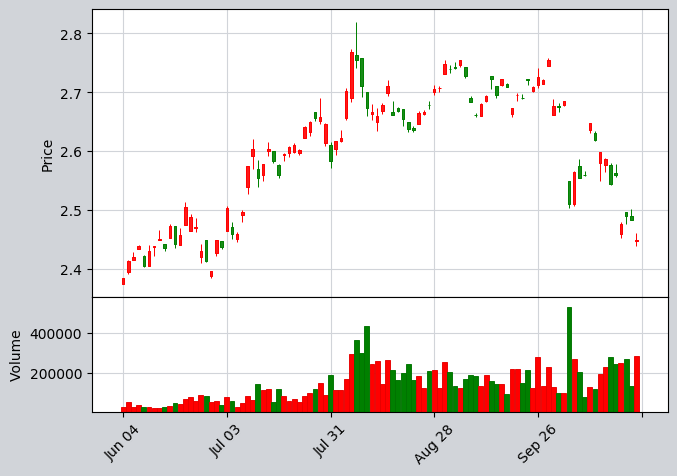

In [ ]:
import pandas as pd
import numpy as np

# 读取测试数据
data = pd.read_csv('test_data.csv', index_col=0)
# 读取的测试数据索引为字符串类型，需要转化为时间日期类型
data.index = pd.to_datetime(data.index)
mpf.plot(data.iloc[100:200], style=my_style, type='candle', volume=True)

In [ ]:
from matplotlib.font_manager import FontManager
fm = FontManager()   # 查询已安装字体
fm.ttflist

[<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal bold normal>,
 <Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>,
 <Font 'SimHei' (SimHei.ttf) normal normal 400 normal>,
 <Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal bold normal>,
 <Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal bold normal>,
 <Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>,
 <Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal bold normal>,
 <Font 'cmss10' (cmss10.ttf) normal normal 400 normal>,
 <Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>,
 <Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>,
 <Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal bold normal>,
 <Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>,
 <Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>,
 <Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal bold normal>,
 <Font 'ST

In [ ]:
# 标题格式，字体为中文字体，颜色为黑色，粗体，水平中心对齐
# title_font = {'fontname': 'pingfang HK', 
title_font = {'fontname': 'SimHei', 
              'size':     '16',
              'color':    'black',
              'weight':   'bold',
              'va':       'bottom',
              'ha':       'center'}
# 红色数字格式（显示开盘收盘价）粗体红色24号字
large_red_font = {'fontname': 'Arial',
                  'size':     '24',
                  'color':    'red',
                  'weight':   'bold',
                  'va':       'bottom'}
# 绿色数字格式（显示开盘收盘价）粗体绿色24号字
large_green_font = {'fontname': 'Arial',
                    'size':     '24',
                    'color':    'green',
                    'weight':   'bold',
                    'va':       'bottom'}
# 小数字格式（显示其他价格信息）粗体红色12号字
small_red_font = {'fontname': 'Arial',
                  'size':     '12',
                  'color':    'red',
                  'weight':   'bold',
                  'va':       'bottom'}
# 小数字格式（显示其他价格信息）粗体绿色12号字
small_green_font = {'fontname': 'Arial',
                    'size':     '12',
                    'color':    'green',
                    'weight':   'bold',
                    'va':       'bottom'}
# 标签格式，可以显示中文，普通黑色12号字
normal_label_font = {'fontname': 'Arial',
                     'size':     '12',
                     'color':    'black',
                     'va':       'bottom',
                     'ha':       'right'}
# 普通文本格式，普通黑色12号字
normal_font = {'fontname': 'Arial',
               'size':     '12',
               'color':    'black',
               'va':       'bottom',
               'ha':       'left'}


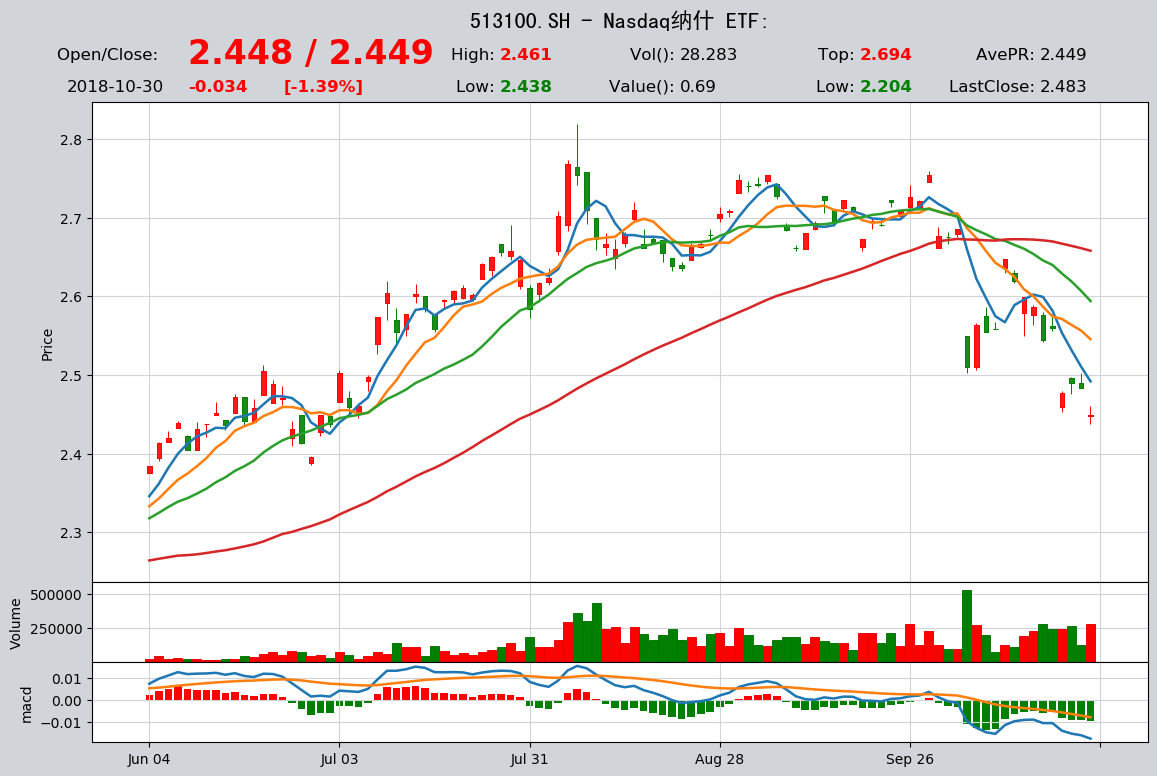

In [ ]:
# plt.rcParams["font.family"] = "SimHei" 
# plt.rcParams["axes.unicode_minus"] = False
plot_data = data.iloc[100: 200]
last_data = plot_data.iloc[-1]

fig = mpf.figure(style=my_style, figsize=(12, 8), facecolor=(0.82, 0.83, 0.85))
ax1 = fig.add_axes([0.06, 0.25, 0.88, 0.60])
ax2 = fig.add_axes([0.06, 0.15, 0.88, 0.10], sharex=ax1)
ax3 = fig.add_axes([0.06, 0.05, 0.88, 0.10], sharex=ax1)
ax1.set_ylabel('price')
ax2.set_ylabel('volume')
ax3.set_ylabel('macd')

t1 = fig.text(0.50, 0.94, '513100.SH - Nasdaq ETF:', **title_font)
t2 = fig.text(0.12, 0.90, 'Open/Close: ', **normal_label_font)
t3 = fig.text(0.14, 0.89, f'{np.round(last_data["open"], 3)} / {np.round(last_data["close"], 3)}', **large_red_font)
t4 = fig.text(0.14, 0.86, f'{last_data["change"]}', **small_red_font)
t5 = fig.text(0.22, 0.86, f'[{np.round(last_data["pct_change"], 2)}%]', **small_red_font)
t6 = fig.text(0.12, 0.86, f'{last_data.name.date()}', **normal_label_font)
t7 = fig.text(0.40, 0.90, 'High: ', **normal_label_font)
t8 = fig.text(0.40, 0.90, f'{last_data["high"]}', **small_red_font)
t9 = fig.text(0.40, 0.86, 'Low: ', **normal_label_font)
t10 = fig.text(0.40, 0.86, f'{last_data["low"]}', **small_green_font)
t11 = fig.text(0.55, 0.90, 'Vol(): ', **normal_label_font)
t12 = fig.text(0.55, 0.90, f'{np.round(last_data["volume"] / 10000, 3)}', **normal_font)
t13 = fig.text(0.55, 0.86, 'Value(): ', **normal_label_font)
t14 = fig.text(0.55, 0.86, f'{last_data["value"]}', **normal_font)
t15 = fig.text(0.70, 0.90, 'Top: ', **normal_label_font)
t16 = fig.text(0.70, 0.90, f'{last_data["upper_lim"]}', **small_red_font)
t17 = fig.text(0.70, 0.86, 'Low: ', **normal_label_font)
t18 = fig.text(0.70, 0.86, f'{last_data["lower_lim"]}', **small_green_font)
t19 = fig.text(0.85, 0.90, 'AvePR: ', **normal_label_font)
t20 = fig.text(0.85, 0.90, f'{np.round(last_data["average"], 3)}', **normal_font)
t21 = fig.text(0.85, 0.86, 'LastClose: ', **normal_label_font)
t22 = fig.text(0.85, 0.86, f'{last_data["last_close"]}', **normal_font)

ap = []    # 生成一个空列表用于存储多个addplot
# 通过ax=ax1参数指定把新的线条添加到ax1中，与K线图重叠
ap.append(mpf.make_addplot(plot_data[['MA5', 'MA10', 'MA20', 'MA60']], ax=ax1))
# 在ax3图表中绘制MACD指标中的快线和慢线
ap.append(mpf.make_addplot(plot_data[['macd-m', 'macd-s']], ax=ax3))
# 使用柱状图绘制快线和慢线的差值，根据差值的数值大小，分别用红色和绿色填充
# 红色和绿色部分需要分别填充，因此先生成两组数据，分别包含大于零和小于等于零的数据
bar_r = np.where(plot_data['macd-h'] > 0, plot_data['macd-h'], 0)
bar_g = np.where(plot_data['macd-h'] <= 0, plot_data['macd-h'], 0)
# 使用柱状图填充（type='bar')，设置颜色分别为红色和绿色
ap.append(mpf.make_addplot(bar_r, type='bar', color='red', ax=ax3))
ap.append(mpf.make_addplot(bar_g, type='bar', color='green', ax=ax3))

# 调用plot()方法，注意传递addplot=ap参数，以添加均线
mpf.plot(plot_data,
         ax=ax1,
         volume=ax2,
         addplot=ap,
         type='candle',
         style=my_style)
fig.show()

In [ ]:
class InterCandle: # 定义一个交互K线图类
    def __init__(self, data, my_style):
        # 初始化交互式K线图对象，历史数据作为唯一的参数用于初始化对象
        self.data = data
        self.style = my_style
        # 设置初始化的K线图显示区间起点为0，即显示第0到第99个交易日的数据（前100个数据）
        self.idx_start = 0
        self.idx_range = 100  # 控制K线图的显示范围大小
        # 鼠标按键状态，False为按键未按下，True为按键按下
        self.press = False
        # 鼠标按下时的x坐标
        self.xpress = None
        
        self.avg_type = 'ma'
        self.indicator = 'macd'
        
        # 初始化figure对象，在figure上建立三个Axes对象并分别设置好它们的位置和基本属性
        self.fig = mpf.figure(style=my_style, figsize=(12, 8), facecolor=(0.82, 0.83, 0.85))
        fig = self.fig
        self.ax1 = fig.add_axes([0.08, 0.25, 0.88, 0.60])
        self.ax2 = fig.add_axes([0.08, 0.15, 0.88, 0.10], sharex=self.ax1)
        self.ax2.set_ylabel('volume')
        self.ax3 = fig.add_axes([0.08, 0.05, 0.88, 0.10], sharex=self.ax1)
        self.ax3.set_ylabel('macd')
        # 初始化figure对象，在figure上预先放置文本并设置格式，文本内容根据需要显示的数据实时更新
        # 初始化时，所有的价格数据都显示为空字符串
        self.t1 = fig.text(0.50, 0.94, '来之不易', **title_font)
        self.t2 = fig.text(0.12, 0.90, 'Open/Close: ', **normal_label_font)
        self.t3 = fig.text(0.14, 0.89, '', **large_red_font)
        self.t4 = fig.text(0.14, 0.86, '', **small_red_font)
        self.t5 = fig.text(0.22, 0.86, '', **small_red_font)
        self.t6 = fig.text(0.12, 0.86, '', **normal_label_font)
        self.t7 = fig.text(0.40, 0.90, 'High: ', **normal_label_font)
        self.t8 = fig.text(0.40, 0.90, '', **small_red_font)
        self.t9 = fig.text(0.40, 0.86, 'Low: ', **normal_label_font)
        self.t10 = fig.text(0.40, 0.86, '', **small_green_font)
        self.t11 = fig.text(0.55, 0.90, 'Vol(): ', **normal_label_font)
        self.t12 = fig.text(0.55, 0.90, '', **normal_font)
        self.t13 = fig.text(0.55, 0.86, 'Amount(): ', **normal_label_font)
        self.t14 = fig.text(0.55, 0.86, '', **normal_font)
        self.t15 = fig.text(0.70, 0.90, 'TopStop: ', **normal_label_font)
        self.t16 = fig.text(0.70, 0.90, '', **small_red_font)
        self.t17 = fig.text(0.70, 0.86, 'LowStop: ', **normal_label_font)
        self.t18 = fig.text(0.70, 0.86, '', **small_green_font)
        self.t19 = fig.text(0.85, 0.90, 'AvgPrice: ', **normal_label_font)
        self.t20 = fig.text(0.85, 0.90, '', **normal_font)
        self.t21 = fig.text(0.85, 0.86, 'LastPrice: ', **normal_label_font)
        self.t22 = fig.text(0.85, 0.86, '', **normal_font)
        
        fig.canvas.mpl_connect('button_press_event', self.on_press)
        # 鼠标按键释放事件与self.on_release回调函数绑定
        fig.canvas.mpl_connect('button_release_event', self.on_release)
        # 鼠标移动事件与self.on_motion回调函数绑定
        fig.canvas.mpl_connect('motion_notify_event', self.on_motion)
        # 将新增的回调函数on_scroll与鼠标滚轮事件绑定
        fig.canvas.mpl_connect('scroll_event', self.on_scroll)


    def refresh_plot(self, idx_start, idx_range):
        ap = []
        plot_data = self.data.iloc[idx_start:idx_start+idx_range]
        
        # 添加K线图重叠均线，根据均线类型添加移动均线或布林带线
        if self.avg_type == 'ma':
            ap.append(mpf.make_addplot(plot_data[['MA5', 'MA10', 'MA20', 'MA60']], ax=self.ax1))
        elif self.avg_type == 'bb':
            ap.append(mpf.make_addplot(plot_data[['bb-u', 'bb-m', 'bb-l']], ax=self.ax1))
        # 添加指标，根据指标类型添加MACD或RSI或DEMA
        if self.indicator == 'macd':
            ap.append(mpf.make_addplot(plot_data[['macd-m', 'macd-s']], ylabel='macd', ax=self.ax3))
            bar_r = np.where(plot_data['macd-h'] > 0, plot_data['macd-h'], 0)
            bar_g = np.where(plot_data['macd-h'] <= 0, plot_data['macd-h'], 0)
            ap.append(mpf.make_addplot(bar_r, type='bar', color='red', ax=self.ax3))
            ap.append(mpf.make_addplot(bar_g, type='bar', color='green', ax=self.ax3))
        elif self.indicator == 'rsi':
            ap.append(mpf.make_addplot([75] * len(plot_data), color=(0.75, 0.6, 0.6), ax=self.ax3))
            ap.append(mpf.make_addplot([30] * len(plot_data), color=(0.6, 0.75, 0.6), ax=self.ax3))
            ap.append(mpf.make_addplot(plot_data['rsi'], ylabel='rsi', ax=self.ax3))
        else:  # indicator == 'dema'
            ap.append(mpf.make_addplot(plot_data['dema'], ylabel='dema', ax=self.ax3))
        # 绘制图表
        mpf.plot(plot_data,
                 ax=self.ax1,
                 volume=self.ax2,
                 addplot=ap,
                 type='candle',
                 style=self.style,
                 datetime_format='%Y-%m',
                 xrotation=0)
        self.fig.show()

    def refresh_texts(self, display_data):
        """ 更新K线图上的价格文本
        """
        # display_data是一个交易日内的所有数据，将这些数据分别填入figure对象上的文本中
        self.t3.set_text(f'{np.round(display_data["open"], 3)} / {np.round(display_data["close"], 3)}')
        self.t4.set_text(f'{display_data["change"]}')
        self.t5.set_text(f'[{np.round(display_data["pct_change"], 2)}%]')
        self.t6.set_text(f'{display_data.name.date()}')
        self.t8.set_text(f'{display_data["high"]}')
        self.t10.set_text(f'{display_data["low"]}')
        self.t12.set_text(f'{np.round(display_data["volume"] / 10000, 3)}')
        self.t14.set_text(f'{display_data["value"]}')
        self.t16.set_text(f'{display_data["upper_lim"]}')
        self.t18.set_text(f'{display_data["lower_lim"]}')
        self.t20.set_text(f'{np.round(display_data["average"], 3)}')
        self.t22.set_text(f'{display_data["last_close"]}')
        # 根据本交易日的价格变动值确定开盘价、收盘价的显示颜色
        if display_data['change'] > 0:  # 如果今日变动额大于0，即今天价格高于昨天，今天价格显示为红色
            close_number_color = 'red'
        elif display_data['change'] < 0:  # 如果今日变动额小于0，即今天价格低于昨天，今天价格显示为绿色
            close_number_color = 'green'
        else:
            close_number_color = 'black'
        self.t1.set_color(close_number_color)
        self.t2.set_color(close_number_color)
        self.t3.set_color(close_number_color)


    def on_press(self, event):
        if not event.inaxes == self.ax1:
            return
        if event.button != 1:
            return
        self.pressed = True
        self.xpress = event.xdata

        # 切换当前ma类型, 在ma、bb、none之间循环
        if event.inaxes == self.ax1 and event.dblclick == 1:
            if self.avg_type == 'ma':
                self.avg_type = 'bb'
            elif self.avg_type == 'bb':
                self.avg_type = 'none'
            else:
                self.avg_type = 'ma'
        # 切换当前indicator类型，在macd/dma/rsi/kdj之间循环
        if event.inaxes == self.ax3 and event.dblclick == 1:
            if self.indicator == 'macd':
                self.indicator = 'dma'
            elif self.indicator == 'dma':
                self.indicator = 'rsi'
            else:
                self.indicator = 'macd'

    # 鼠标移动事件处理
    def on_motion(self, event):
        # 如果鼠标按键没有按下pressed == False，则什么都不做，退出处理函数
        if not self.pressed:
            return
        # 如果移动出了ax1的范围，也退出处理函数
        if not event.inaxes == self.ax1:
            return
        # 如果鼠标在ax1范围内，且左键按下，则开始计算dx，并根据dx计算新的K线图起点
        dx = int(event.xdata - self.xpress)
        # 前面介绍过了，新的起点N(new) = N - dx
        new_start = self.idx_start - dx
        # 设定平移的左右界限，如果平移后超出界限，则不再平移
        if new_start <= 0:
            new_start = 0
        if new_start >= len(self.data) - 100:
            new_start = len(self.data) - 100
        # 清除各个图表Axes中的内容，准备以新的起点重新绘制
        self.ax1.clear()
        self.ax2.clear()
        self.ax3.clear()
        # 更新图表上的文字、以新的起点开始绘制K线图
        self.refresh_texts(self.data.iloc[new_start])
        self.refresh_plot(new_start)

    # 鼠标按键释放
    def on_release(self, event):
        # 按键释放后，设置鼠标的pressed为False
        self.pressed = False
        # 此时别忘了最后一次更新K线图的起点，否则下次拖拽的时候就不会从这次的起点开始移动了
        dx = int(event.xdata - self.xpress)
        self.idx_start -= dx
        if self.idx_start <= 0:
            self.idx_start = 0
        if self.idx_start >= len(self.data) - 100:
            self.idx_start = len(self.data) - 100

    def on_scroll(self, event):
        # 仅当鼠标滚轮在axes1范围内滚动时起作用
        if event.inaxes != self.ax1:
            return
        if event.button == 'down':
            # 缩小20%显示范围
            scale_factor = 0.8
        if event.button == 'up':
            # 放大20%显示范围
            scale_factor = 1.2
        # 设置K线的显示范围大小
        self.idx_range = int(self.idx_range * scale_factor)
        # 限定可以显示的K线图的范围，最少不能少于30个交易日，最大不能超过当前位置与
        # K线数据总长度的差
        data_length = len(self.data)
        if self.idx_range >= data_length - self.idx_start:
            self.idx_range = data_length - self.idx_start
        if self.idx_range <= 30:
            self.idx_range = 30 
        # 更新图表（注意因为多了一个参数idx_range，refresh_plot函数也有所改动）
        self.ax1.clear()
        self.ax2.clear()
        self.ax3.clear()
        self.refresh_texts(self.data.iloc[self.idx_start])
        self.refresh_plot(self.idx_start, self.idx_range)


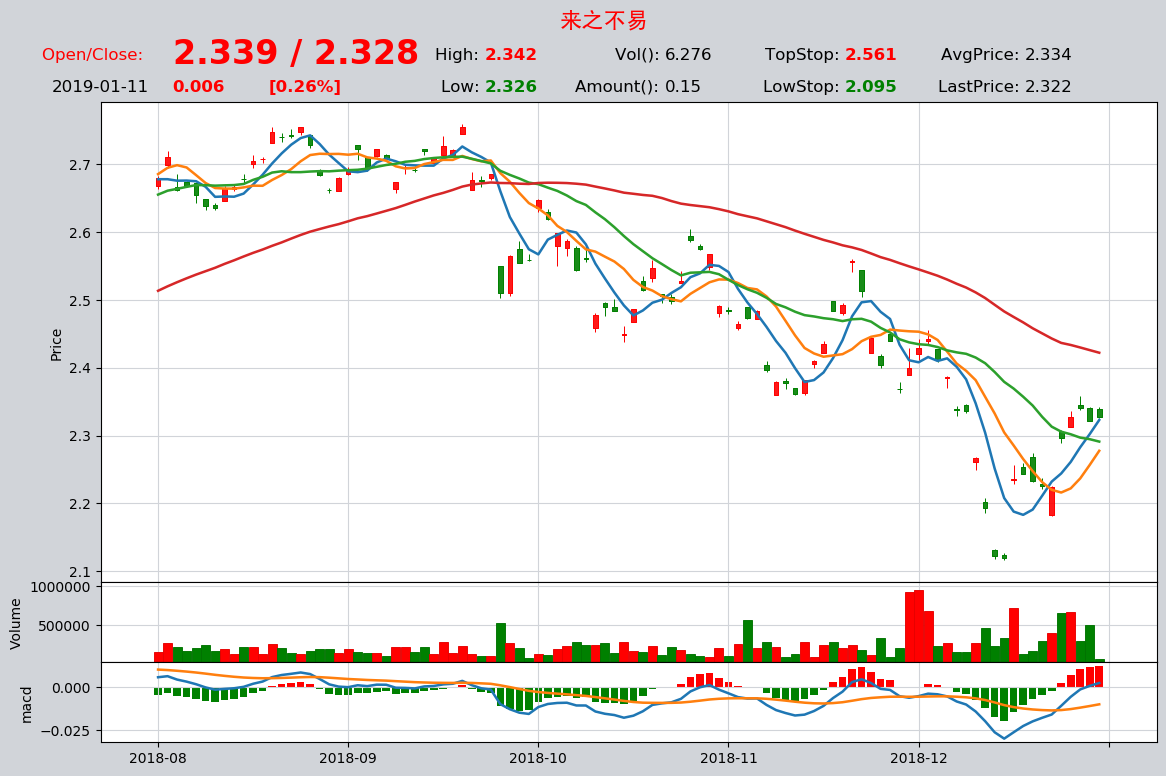

In [ ]:
import pandas as pd
import numpy as np
import mplfinance as mpf

if __name__ == '__main__':

    # 读取测试数据
    data = pd.read_csv('test_data.csv', index_col=0)
    # 读取的测试数据索引为字符串类型，需要转化为时间日期类型
    data.index = pd.to_datetime(data.index)    

    # 设置mplfinance的蜡烛颜色，up为阳线颜色，down为阴线颜色
    my_color = mpf.make_marketcolors(up='r',
                                     down='g',
                                     edge='inherit',
                                     wick='inherit',
                                     volume='inherit')
    # 设置图表的背景色
    my_style = mpf.make_mpf_style(marketcolors=my_color,
                                  figcolor='(0.82, 0.83, 0.85)',
                                  gridcolor='(0.82, 0.83, 0.85)')

    # 标题格式，字体为中文字体，颜色为黑色，粗体，水平中心对齐
    # title_font = {'fontname': 'pingfang HK', 
    title_font = {'fontname': 'SimHei', 
                  'size':     '16',
                  'color':    'black',
                  'weight':   'bold',
                  'va':       'bottom',
                  'ha':       'center'}
    # 红色数字格式（显示开盘收盘价）粗体红色24号字
    large_red_font = {'fontname': 'Arial',
                      'size':     '24',
                      'color':    'red',
                      'weight':   'bold',
                      'va':       'bottom'}
    # 绿色数字格式（显示开盘收盘价）粗体绿色24号字
    large_green_font = {'fontname': 'Arial',
                        'size':     '24',
                        'color':    'green',
                        'weight':   'bold',
                        'va':       'bottom'}
    # 小数字格式（显示其他价格信息）粗体红色12号字
    small_red_font = {'fontname': 'Arial',
                      'size':     '12',
                      'color':    'red',
                      'weight':   'bold',
                      'va':       'bottom'}
    # 小数字格式（显示其他价格信息）粗体绿色12号字
    small_green_font = {'fontname': 'Arial',
                        'size':     '12',
                        'color':    'green',
                        'weight':   'bold',
                        'va':       'bottom'}
    # 标签格式，可以显示中文，普通黑色12号字
    normal_label_font = {'fontname': 'Arial',
                         'size':     '12',
                         'color':    'black',
                         'va':       'bottom',
                         'ha':       'right'}
    # 普通文本格式，普通黑色12号字
    normal_font = {'fontname': 'DejaVu Sans',
                   'size':     '12',
                   'color':    'black',
                   'va':       'bottom',
                   'ha':       'left'}


    candle = InterCandle(data, my_style)
    candle.idx_start = 150
    candle.idx_range = 100
    candle.refresh_texts(data.iloc[249])
    candle.refresh_plot(150, 100)

In [ ]:
plt.get_backend()

'module://ipykernel.pylab.backend_inline'

In [ ]:
plt.ion()

In [ ]:
import matplotlib

In [ ]:
matplotlib.rcsetup.non_interactive_bk

['agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template']

In [ ]:
from matplotlib import pylab

In [ ]:
%matplotlib qt5

ImportError: libGL.so.1: cannot open shared object file: No such file or directory

In [ ]:
import pandas as pd
import mplfinance as mpf
# from matplotlib.font_manager import FontProperties  # 导入FontProperties
# font = FontProperties(fname="SimHei.ttf", size=14)  # 设置字体
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
# plt.rcParams['axes.unicode_minus'] = False
# 解决mplfinance绘制输出中文乱码
s = mpf.make_mpf_style(base_mpf_style='yahoo', rc={'font.family': 'SimHei'})


In [ ]:
matplotlib.matplotlib_fname()

'/opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc'

In [ ]:
df = pd.read_csv('KQ.m@SHFE.ag_m01.csv')
df['updatetime'] = pd.to_datetime(df.datetime, origin=pd.Timestamp('1970-01-01 08:00:00'))
df.set_index('updatetime', inplace=True)
df.head(3)

,barpos,symbol,duration,close,open,high,low,volume,datetime,open_oi,close_oi
updatetime,,,,,,,,,,,
2021-04-02 02:25:00,0,KQ.m@SHFE.ag,60,5207.0,5209.0,5209.0,5207.0,251.0,1.617302e+18,449705.0,449698.0
2021-04-02 02:26:00,1,KQ.m@SHFE.ag,60,5206.0,5207.0,5208.0,5206.0,440.0,1.617302e+18,449698.0,449472.0
2021-04-02 02:27:00,2,KQ.m@SHFE.ag,60,5207.0,5206.0,5207.0,5205.0,894.0,1.617302e+18,449472.0,448990.0


In [ ]:

# 设置mplfinance的蜡烛颜色，up为阳线颜色，down为阴线颜色
my_color = mpf.make_marketcolors(up='r',
                                 down='g',
                                 edge='inherit',
                                 wick='inherit',
                                 volume='inherit')
# 设置图表的背景色
my_style = mpf.make_mpf_style(marketcolors=my_color,
                              figcolor='(0.82, 0.83, 0.85)',
                              gridcolor='(0.82, 0.83, 0.85)')


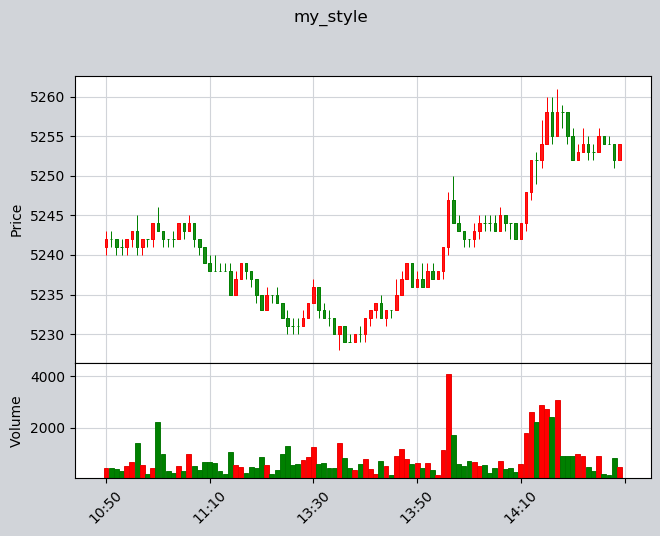

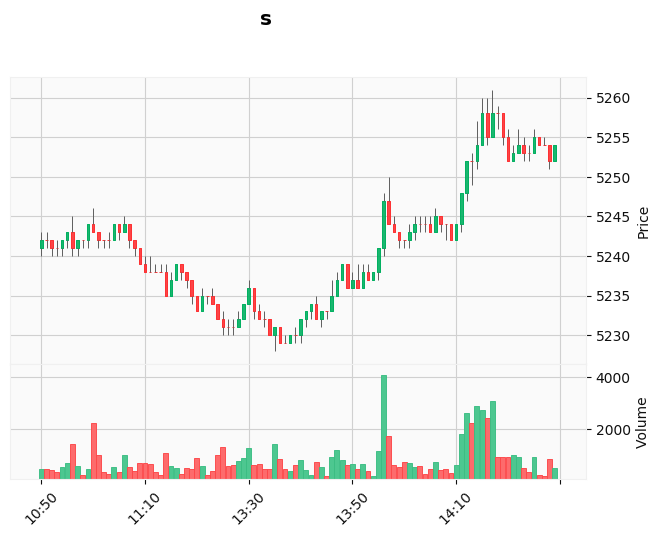

In [ ]:
# 读取测试数据
data = df.copy()
mpf.plot(data.iloc[100:200], title='my_style', style=my_style, type='candle', volume=True)
mpf.plot(data.iloc[100:200], title='s', style=s, type='candle', volume=True)
# plt.show()

### 设置Dataframe显示列数和宽度

In [ ]:
pd.set_option('display.max_columns',9)    # 设置df显示列数
pd.set_option('display.width',1000)
# pd.set_option('expand_frame_repr', True)

### Jupyter Notebook环境下代码调试方法  211014

In [ ]:
from IPython.core.debugger import set_trace   # 方法1：ipdb

def sum(a,b):
    set_trace()
    c=a+b
    return c
a=1
b=2
set_trace()
c=sum(a,b)
print (c)

--Return--
None
> <ipython-input-64-61c39027e9ed>(9)<module>()
      7 a=1
      8 b=2
----> 9 set_trace()
     10 c=sum(a,b)
     11 print (c)

ipdb> n
> /opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py(3334)run_code()
   3332             finally:
   3333                 # Reset our crash handler in place
-> 3334                 sys.excepthook = old_excepthook
   3335         except SystemExit as e:
   3336             if result is not None:

ipdb> s
> /opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py(3350)run_code()
   3348             self.showtraceback(running_compiled_code=True)
   3349         else:
-> 3350             outflag = False
   3351         return outflag
   3352 

ipdb> s
> /opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py(3351)run_code()
   3349         else:
   3350             outflag = False
-> 3351         return outflag
   3352 
   3353     # For backwards compatibility

ipdb> s
--Return--
False
>

ipdb> n
> /opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py(3351)run_code()
   3349         else:
   3350             outflag = False
-> 3351         return outflag
   3352 
   3353     # For backwards compatibility

ipdb> n
Internal StopIteration: False
> /opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py(3247)run_ast_nodes()
   3245 
   3246                 for node,mode in to_run:
-> 3247                     if mode == 'exec':
   3248                         mod = Module([node], [])
   3249                     elif mode == 'single':

ipdb> n
> /opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py(3246)run_ast_nodes()
   3244                     to_run.append((node, 'single'))
   3245 
-> 3246                 for node,mode in to_run:
   3247                     if mode == 'exec':
   3248                         mod = Module([node], [])

ipdb> c
3


In [ ]:
import pdb    #方法2 pdb

def sum(a,b):
    pdb.set_trace()
    c=a+b
    return c
a=1
b=2
c=sum(a,b)
print (c)

> <ipython-input-65-deabef9a230e>(5)sum()
-> c=a+b
(Pdb) a
a = 1
b = 2
(Pdb) c
3


### 获取列表元素下标

In [ ]:
my_list = [11, 22, 33, 44, 55]
my_list.index(33)

2

In [ ]:
a = 33
b = 0 if a not in my_list else my_list.index(a)
b

2

In [ ]:
a = pd.Series([1,2,3])
isinstance(a, pd.Series)

True

### 获取变量名（未完）

In [ ]:
mylocals = locals()

In [ ]:
mylocals['aaa'] 

'23asa'

In [ ]:
for k,v in locals().items():
    if v == 33:
        print(k)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
aaa = '23asa'
bbb = 'kjljl2'
lst = [aaa,bbb,aaa]
value = lst[1]
loc = locals()

def get_variable_name(variable):
#     print loc
    for key in loc:
        if loc[key] == variable:
            return key

get_variable_name(value)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

### 用类变量代替global 定义全局变量 211026

In [ ]:
# -*-coding: utf-8 -*-
from data_def import *

#在函数里面使用和打印全局变量的值
def function_test():
    print("global value in function", global_value.distance)
    global_value.distance=234
    print("global value in function",global_value.distance)

print("global value in main:",global_value.distance)   #打印出全局变量的初始值：34
t=test()
t.change_1()                                           #在类里面改变全局变量的值：34->40
print("global value in main:",global_value.distance)
t.change_2()                                           #在类里面改变全局变量的值：40->90
print("global value in main:",global_value.distance)
function_test()                                        #在自定义函数里面使用和改变全局变量的值 90->234
global_value.distance=11                               #在main主函数里面改变全局变量的值 234->11
t.print_value()                                        #在类里面查看已经改变的全局变量的值 11


global value in main: 34
distance in class: 40
global value in main: 40
distance in class: 40
global value in main: 40
global value in function 40
global value in function 234
distance in class: 11


In [ ]:
datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')  # 日期格式

'2021-10-26 15:44:42'

### 日志处理（logging模块）211030

In [ ]:
import logging

In [ ]:
# 创建一个日志器log并设置其日志级别为INFO，来自https://www.cnblogs.com/yyds/p/6901864.html
log = logging.getLogger('my_log')
log.handlers.clear()    # 解决日志重复输出问题，来自https://www.cnblogs.com/jiyanjiao-702521/p/9597985.html
# log.setLevel(logging.DEBUG)  # 设置日志器将会处理的日志消息的最低级别

sh = logging.StreamHandler()    # 创建一个流处理器
sh.setLevel(logging.ERROR)      # 设置日志的显示级别
fmt = logging.Formatter("%(asctime)s - %(name)s - %(levelname)s[:%(lineno)d]: %(message)s", "%Y-%m-%d %H:%M:%S")  # 创建格式器
sh.setFormatter(fmt)   # 添加到流处理器

# 为日志器添加流处理器
log.addHandler(sh)

# 日志输出
log.debug('debug message')
log.info('info message')
log.warning('warning message')
log.error('error message')
log.critical('critical message')

2021-10-30 11:15:13 - my_log - ERROR[:18]: error message
2021-10-30 11:15:13 - my_log - FATAL[:19]: critical message


In [ ]:
# 也可以自定义为一个函数
def my_log():
    logger = logging.getLogger('mysql.log')
    # 每次被调用后，清空已经存在handler
    logger.handlers.clear()

    ch = logging.StreamHandler()
    ch.setLevel(logging.ERROR)
    fmt = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
    ch.setFormatter(fmt)

    logger.addHandler(ch)

    return logger


my_log().error('run one')
my_log().error('run two')
my_log().error('run three')

2021-10-30 11:11:08,172 - mysql.log - ERROR - run one
2021-10-30 11:11:08,173 - mysql.log - ERROR - run two
2021-10-30 11:11:08,174 - mysql.log - ERROR - run three


### 解决绘图阻塞 211031：目前看到的是notebook环境与vscode环境下连续绘图的实现方法不一样

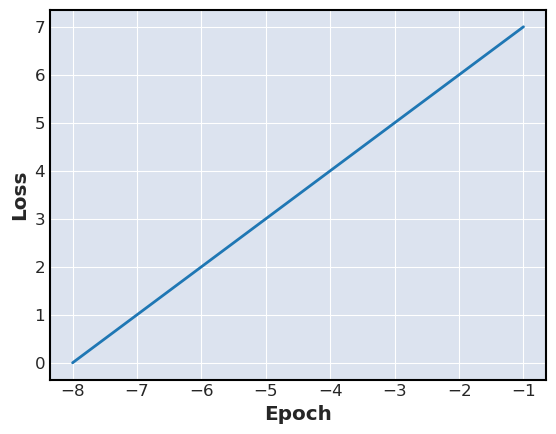

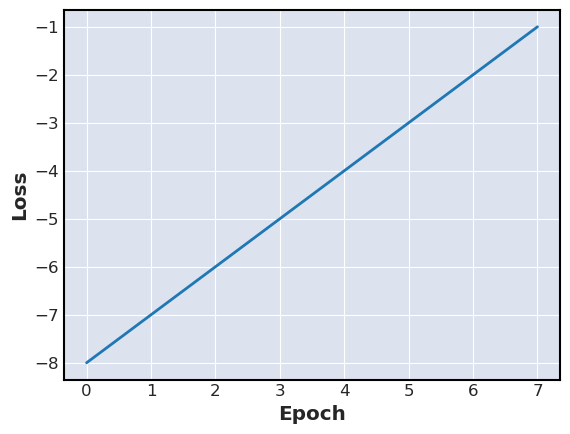

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

axis_x = np.array([-8, -7, -6, -5, -4, -3, -2, -1])
axis_y = np.array([0, 1, 2, 3, 4, 5, 6, 7])
# fig1 = plt.figure(1)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.plot(axis_x, axis_y)
# plt.draw()
plt.show()
# plt.pause(1)# 间隔的秒数： 4s
# plt.close(fig1)
plt.close()


# fig2 = plt.figure(2)
# fig2 = plt.figure(1)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.plot(axis_y, axis_x)
# plt.draw()
plt.show()
plt.pause(1)# 间隔的秒数：6s
# plt.close(fig2)
plt.close()



In [ ]:
import pandas as pd
df = pd.read_csv('KQ.m@SHFE.ag_m01.csv')
df['updatetime'] = pd.to_datetime(df.datetime, origin=pd.Timestamp('1970-01-01 08:00:00'))
df.set_index('updatetime', inplace=True)

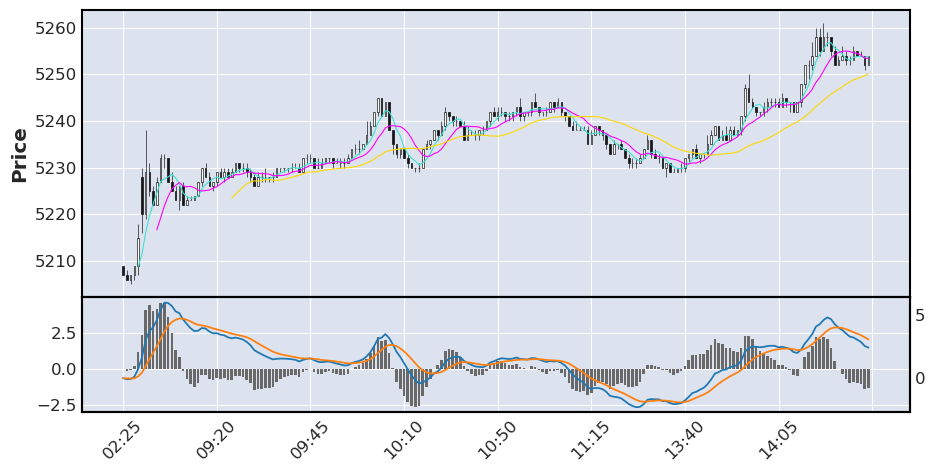

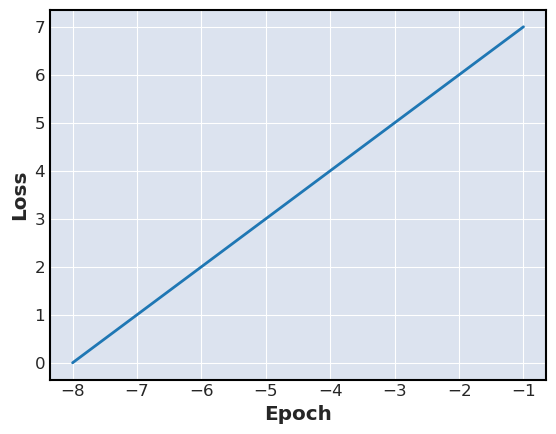

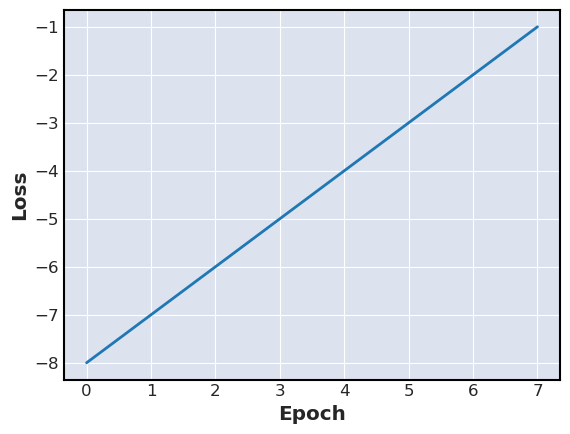

In [ ]:
import numpy as np

# plt.ion()   # 在vscode环境下这一句是关键，在这里却不起作用
draw_kline(df[:200], sub=['macd'])

# https://blog.csdn.net/qq_36248632/article/details/90321044
axis_x = np.array([-8, -7, -6, -5, -4, -3, -2, -1])
axis_y = np.array([0, 1, 2, 3, 4, 5, 6, 7])
fig = plt.figure('f1')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.plot(axis_x, axis_y)
# plt.draw()
# plt.pause(1)# 显示维持
# plt.close()
fig = plt.figure('f2')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.plot(axis_y, axis_x)
# plt.draw()
# plt.pause(1) # 显示维持
# input('Any key to close all figures.')
# plt.close()

### 队列与多线程 211104 

In [ ]:
# 子线程之间通过队列通信
import time
from queue import Queue
from threading import Thread
from random import randint
# 3个队列
my_queue = Queue()
def f1(my_queus):
    for i in range(3):
        time.sleep(1)
        num = randint(0,10)
        print(f'put_{i}: {num}')
        my_queue.put(num)


def f2(my_queus):
    for i in range(3):
        time.sleep(2)
        num = my_queue.get()
        print(f'get_{i}: {num}')

t1 = Thread(target=f1,args=(my_queue,))
t2 = Thread(target=f2,args=(my_queue,))
t1.start()
t2.start()
# t1.join()
# t2.join()

put_0: 6
put_1: 4
get_0: 6
put_2: 6
get_1: 4
get_2: 6


In [ ]:
# 主线程与子线程通过队列通信，队列可以是全局变量，也可以是参数
import time
from queue import Queue
from threading import Thread
from random import randint

my_queue = Queue()
def f1():
    global my_queue
    for i in range(5):
        time.sleep(1)
        num = randint(0,10)
        print(f'put_{i}: {num}')
        my_queue.put(num)

t1 = Thread(target=f1)
t1.start()
try:
    n = 0
    while True:
        time.sleep(2)
        num = my_queue.get()
        print(f'get_{n}: {num}')
        n += 1
except KeyboardInterrupt:
    print('收到指令退出。')
    exit


put_0: 10
put_1: 8
get_0: 10
put_2: 10
put_3: 9
get_1: 8
put_4: 6
get_2: 10
get_3: 9
get_4: 6
收到指令退出。


In [ ]:
# 主线程与子线程通过队列通信，队列可以是全局变量，也可以是参数
import pandas as pd
import time
from queue import Queue
from threading import Thread
from random import randint

class queue_data:
    def __init__(self, df, vol, sub, my_title, signals) -> None:
        self.df = df
        self.vol = vol
        self.sub = sub
        self.my_titile = my_title
        self.signals = signals

df = pd.read_csv('KQ.m@SHFE.ag_m01.csv')
df['updatetime'] = pd.to_datetime(df.datetime, origin=pd.Timestamp('1970-01-01 08:00:00'))
df.set_index('updatetime', inplace=True)

draw_queue = Queue()
def working():
    global draw_queue
    for i in range(len(df)):
        time.sleep(0.5)
        my_queue.put(df.iloc[i])

t1 = Thread(target=f1)
t1.start()

try:
#     n = 0
    while True:
#         time.sleep(2)
        se = my_queue.get()
        print(f'{se.barpos} {se.name}')
        n += 1
except KeyboardInterrupt:
    print('收到指令退出。')
    exit


2021-04-02 02:25:00
2021-04-02 02:26:00
2021-04-02 02:27:00
2021-04-02 02:28:00
2021-04-02 02:29:00
2021-04-02 09:00:00
2021-04-02 09:01:00
2021-04-02 09:02:00
2021-04-02 09:03:00
2021-04-02 09:04:00
2021-04-02 09:05:00
收到指令退出。


In [ ]:
my_queue.empty()

True

In [ ]:
if not my_queue.empty():
    my_queue.get()

In [ ]:
my_queue.qsize()

0

In [ ]:
empty: 检查队列是否为空，为空返回True，不为空返回False
full : 判断队列是否已经满了

join & task_done :
#举例
from queue import Queue
q = queue.Queue(2)
q.put('a')
q.put('b')
# 程序会一直卡在下面这一行，只要队列中还有值，程序就不会退出
q.join()
-------------------------------------------------------------
q = queue.Queue(2)
q.put('a')
q.put('b')

q.get() 
q.get()
# 插入两个元素之后再取出两个元素，执行后发现，程序还是卡在下面的那个join代码
q.join()
-------------------------------------------------------------
q = queue.Queue(2)
q.put('a')
q.put('b')

q.get()
# get取完队列中的一个值后，使用task_done方法告诉队列，我已经取出了一个值并处理完毕,下同
q.task_done() 
q.get()
#在每次get取值之后，还需要在跟队列声明一下，我已经取出了数据并处理完毕，这样执行到join代码的时候才不会被卡住
q.task_done()
q.join()


SyntaxError: invalid character in identifier (<ipython-input-173-3e9f1efc202e>, line 1)

### 输入字符无需回车 211104

In [ ]:
# https://blog.csdn.net/su_cicada/article/details/81166214
# 在本平台上看不到所需的输入效果

class _Getch:
    """Gets a single character from standard input.  Does not echo to the
screen."""
    def __init__(self):
        try:
            self.impl = _GetchWindows()
        except ImportError:
            self.impl = _GetchUnix()

    def __call__(self): return self.impl()


class _GetchUnix:
    def __init__(self):
        import tty, sys

    def __call__(self):
        import sys, tty, termios
        fd = sys.stdin.fileno()
        old_settings = termios.tcgetattr(fd)
        try:
            tty.setraw(sys.stdin.fileno())
            ch = sys.stdin.read(1)
        finally:
            termios.tcsetattr(fd, termios.TCSADRAIN, old_settings)
        return ch


class _GetchWindows:
    def __init__(self):
        import msvcrt

    def __call__(self):
        import msvcrt
        return msvcrt.getch()


getch = _Getch()

In [ ]:
# https://www.codenong.com/25329134/
    
import time, win32api
import msvcrt
cursorX = 0
cursorY = 0
while True:
    cursorX, cursorY = win32api.GetCursorPos()
    time.sleep(600)
    cursorX = cursorX + 10
    win32api.SetCursorPos((cursorX,cursorY))
    cursorX, cursorY = win32api.GetCursorPos()
    time.sleep(600)
    cursorX = cursorX - 10
    win32api.SetCursorPos((cursorX,cursorY))
    if msvcrt.kbhit():
        if ord(msvcrt.getch()) != None:
            break